In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
#from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
#import lightgbm as lgb
#from lightgbm import LGBMClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split
from scipy import interp
from sklearn.metrics import classification_report, accuracy_score, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv("after_outlier_dataset.csv", index_col=0)

In [4]:
df

,disrict,client_catg,region,region_group,coop_time,is_weekday_mean,transactions_count,tarif_type_mean,tarif_type_std,tarif_type_min,...,months_number_max_mean,counter_type_range,counter_type_max_mean,invoice_month_range,invoice_month_max_mean,invoice_year_range,invoice_year_max_mean,delta_index_range,delta_index_max_mean,target
0,0.000000,0.0,0.000000,0.0,0.582524,0.028571,0.073394,0.040251,0.000000,0.142857,...,0.017515,0.0,0.000000,1.000000,0.227106,1.000000,0.721412,0.001192,0.788090,0
1,1.000000,0.0,0.020134,0.0,0.409709,0.054054,0.077982,0.040251,0.000000,0.142857,...,0.009348,0.0,0.000000,0.818182,0.270677,1.000000,0.657374,0.000899,0.788028,0
2,0.222222,0.0,0.671141,1.0,0.786408,0.055556,0.034404,0.040251,0.000000,0.142857,...,0.009481,0.0,0.000000,0.818182,0.189676,1.000000,0.739702,0.002560,0.788085,0
3,1.000000,0.0,0.013423,0.0,0.537864,0.050000,0.038991,0.040251,0.000000,0.142857,...,0.004713,0.0,0.000000,0.818182,0.229086,0.500000,0.312570,0.000012,0.788415,0
4,0.222222,0.0,0.677852,1.0,0.120388,0.285714,0.025229,0.040251,0.000000,0.142857,...,0.000846,0.0,0.000000,0.909091,0.167116,0.285714,0.196191,0.001997,0.788043,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123552,0.000000,0.0,0.000000,0.0,0.304854,0.200000,0.073394,0.289597,0.700486,0.095238,...,0.010998,1.0,0.026667,1.000000,0.291209,0.642857,0.354148,0.001358,0.788062,0
123553,0.000000,0.0,0.000000,0.0,0.955340,0.000000,0.002294,0.007318,0.000000,0.095238,...,0.003666,0.0,0.000000,0.727273,0.204082,0.142857,0.092051,0.000026,0.788044,0
123554,0.333333,0.0,0.704698,1.0,0.166990,0.000000,0.087156,0.529420,0.747623,0.142857,...,0.000275,1.0,0.070000,0.727273,0.186636,0.428571,0.290447,0.000735,0.788113,0
123555,0.333333,0.0,0.704698,1.0,0.188350,0.194444,0.075688,0.411657,0.730415,0.142857,...,0.010403,1.0,0.042424,0.909091,0.211982,0.500000,0.394622,0.000921,0.788094,0


In [5]:
not_fraud = df[(df['target'] == 0 )].count()[1]
fraud = df[(df['target'] == 1 )].count()[1]
print('No. of Non-fraudalent Cases: '+ str(not_fraud))
print('No. of Fraudalent Cases: '+ str(fraud))

No. of Non-fraudalent Cases: 110575
No. of Fraudalent Cases: 6765


In [6]:
X = df.drop('target', axis=1)
y = df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

## Borderline SMOTE with SVM

In [7]:
# from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE

X_train_s, y_train_s = SVMSMOTE(random_state=42).fit_resample(X_train, y_train.ravel())


In [8]:
from collections import Counter
print(sorted(Counter(y_train_s).items()))

[(0, 77428), (1, 77428)]


In [9]:
rfc = RandomForestClassifier(n_estimators=100,random_state = 42)
rfc.fit(X_train_s, y_train_s)
rfc_pred = rfc.predict(X_test)

In [10]:
print(accuracy_score(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

0.9402874836657008
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     33147
           1       0.48      0.28      0.35      2055

    accuracy                           0.94     35202
   macro avg       0.72      0.63      0.66     35202
weighted avg       0.93      0.94      0.93     35202



In [45]:
conf(rfc,X_test_s, y_test)

NameError: name 'X_test_s' is not defined

In [18]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_s,y_train_s)
predictions = gbc.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test,predictions))

0.9200045451962957
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     33147
           1       0.34      0.38      0.36      2055

    accuracy                           0.92     35202
   macro avg       0.65      0.67      0.66     35202
weighted avg       0.92      0.92      0.92     35202



In [19]:
logmodel = LogisticRegression()
logmodel.fit(X_train_s,y_train_s)
predictions = logmodel.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test,predictions))

0.8387023464575877
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     33147
           1       0.18      0.50      0.27      2055

    accuracy                           0.84     35202
   macro avg       0.57      0.68      0.59     35202
weighted avg       0.92      0.84      0.87     35202



C:\Users\moinu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
knneig = KNeighborsClassifier(n_neighbors=10)
knneig.fit(X_train_s, y_train_s)
pred_knneigh = knneig.predict(X_test)
score_knneigh_before = accuracy_score(y_test, pred_knneigh)
print("Score KNeighnors :",score_knneigh_before)
print(classification_report(y_test, pred_knneigh))

Score KNeighnors : 0.8499801147662065
              precision    recall  f1-score   support

           0       0.96      0.88      0.92     33147
           1       0.17      0.39      0.23      2055

    accuracy                           0.85     35202
   macro avg       0.56      0.63      0.57     35202
weighted avg       0.91      0.85      0.88     35202



In [21]:
xg = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")
xg.fit(X_train_s,y_train_s)
predictions = xg.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test,predictions))

C:\Users\moinu\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9419635247997273
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     33147
           1       0.51      0.26      0.35      2055

    accuracy                           0.94     35202
   macro avg       0.73      0.62      0.66     35202
weighted avg       0.93      0.94      0.93     35202



C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [22]:
ada = AdaBoostClassifier()
ada.fit(X_train_s,y_train_s)
predictions = ada.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test,predictions))

0.8898073973069712
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     33147
           1       0.24      0.40      0.30      2055

    accuracy                           0.89     35202
   macro avg       0.60      0.66      0.62     35202
weighted avg       0.92      0.89      0.90     35202



In [28]:
import tensorflow as tf
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64,activation='relu',input_shape= (104,)))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                6720      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 15,169
Trainable params: 15,169
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

epochs_hist = model.fit(X_train_s,y_train_s,epochs=150,batch_size=20)

Epoch 1/150
7743/7743 [==============================] - 7s 893us/step - loss: 0.1721 - accuracy: 0.9350
Epoch 2/150
7743/7743 [==============================] - 7s 894us/step - loss: 0.1711 - accuracy: 0.9350
Epoch 3/150
7743/7743 [==============================] - 7s 911us/step - loss: 0.1696 - accuracy: 0.9358
Epoch 4/150
7743/7743 [==============================] - 7s 908us/step - loss: 0.1690 - accuracy: 0.9359
Epoch 5/150
7743/7743 [==============================] - 7s 910us/step - loss: 0.1677 - accuracy: 0.9365
Epoch 6/150
7743/7743 [==============================] - 7s 905us/step - loss: 0.1672 - accuracy: 0.9368
Epoch 7/150
7743/7743 [==============================] - 7s 963us/step - loss: 0.1659 - accuracy: 0.9376
Epoch 8/150
7743/7743 [==============================] - 8s 999us/step - loss: 0.1647 - accuracy: 0.9378
Epoch 9/150
7743/7743 [==============================] - 7s 958us/step - loss: 0.1646 - accuracy: 0.9377
Epoch 10/150
7743/7743 [==============================]

Text(0.5, 1.0, 'Loss and Accuracy plot')

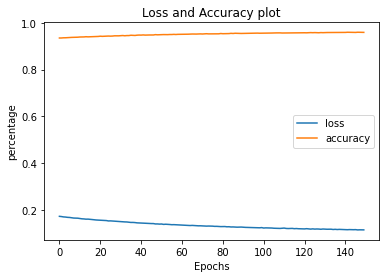

In [34]:
y_pred=model.predict(X_test)

y_pred = (y_pred>0.5)

plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('percentage')
plt.legend(['loss','accuracy'])
plt.title('Loss and Accuracy plot')

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     33147
           1       0.26      0.41      0.32      2055

    accuracy                           0.90     35202
   macro avg       0.61      0.67      0.63     35202
weighted avg       0.92      0.90      0.91     35202



In [20]:
# y_train_res = y_train_s.reshape(-1, 1)
# data_res = np.concatenate((X_train_s, y_train_s), axis = 0)
# data_res

## RFE

In [11]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, learning_curve, cross_val_score, RandomizedSearchCV, train_test_split, StratifiedKFold

rfecv = RFECV(estimator=rfc, cv=StratifiedKFold(5, random_state=42, shuffle=True), scoring="accuracy")
rfecv.fit(X_train_s, y_train_s)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
      estimator=RandomForestClassifier(random_state=42), scoring='accuracy')

In [12]:
rfecv.n_features_

95

In [22]:
X_rfe = X_train_s.iloc[:, rfecv.support_]

In [23]:
print("\"X\" dimension: {}".format(X_train_s.shape))
print("\"X\" column list:", X_train_s.columns.tolist())
print("\"X_rfe\" dimension: {}".format(X_rfe.shape))
print("\"X_rfe\" column list:", X_rfe.columns.tolist())

"X" dimension: (154856, 104)
"X" column list: ['disrict', 'client_catg', 'region', 'region_group', 'coop_time', 'is_weekday_mean', 'transactions_count', 'tarif_type_mean', 'tarif_type_std', 'tarif_type_min', 'tarif_type_max', 'counter_number_mean', 'counter_number_std', 'counter_number_min', 'counter_number_max', 'counter_statue_mean', 'counter_statue_std', 'counter_statue_min', 'counter_statue_max', 'counter_code_mean', 'counter_code_std', 'counter_code_min', 'counter_code_max', 'reading_remarque_mean', 'reading_remarque_std', 'reading_remarque_min', 'reading_remarque_max', 'consommation_level_1_mean', 'consommation_level_1_std', 'consommation_level_1_min', 'consommation_level_1_max', 'consommation_level_2_mean', 'consommation_level_2_std', 'consommation_level_2_min', 'consommation_level_2_max', 'consommation_level_3_mean', 'consommation_level_3_std', 'consommation_level_3_min', 'consommation_level_3_max', 'consommation_level_4_mean', 'consommation_level_4_std', 'consommation_level_4_

In [26]:
X_rfe_train, X_rfe_test, y_train, y_test = train_test_split(X_rfe, y_train_s, 
                                                                             test_size=0.3, 
                                                                             stratify=y_train_s,
                                                                             random_state=42)
print("Train size: {}".format(len(y_train_r)))
print("Test size: {}".format(len(y_test_r)))

Train size: 108399
Test size: 46457


In [43]:
# helping function

def conf(algo_name,X_test, y_test):
    y_pred = algo_name.predict(X_test)
    forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
    sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.title(str(algo_name)[0:str(algo_name).find('(')])

In [28]:
results_test = {}
results_train = {}
list_algos=[]

def predict(algo_name,X_train,y_train,X_test,y_test, atype='',verbose=0):
    algo_name.fit(X_train, y_train)
    Y_pred = algo_name.predict(X_test)
    acc_train = round(algo_name.score(X_train, y_train) * 100, 2)
    acc_val = round(algo_name.score(X_test, y_test) * 100, 2)
    
    results_test[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_train
    list_algos.append(str(algo_name)[0:str(algo_name).find('(')])
    if verbose ==0:
        print("Training Accuracy: " + str(acc_train))
        print("Testing  Accuracy: "+ str(acc_val))
    else:
        return Y_pred

In [29]:
# KNN

knneig = KNeighborsClassifier(n_neighbors=2)
knneig.fit(X_rfe_train, y_train)
predict(knneig,X_rfe_train,y_train,X_rfe_test,y_test)
print(classification_report(y_test, knneig.predict(X_rfe_test)))

Training Accuracy: 99.36
Testing  Accuracy: 95.87
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     23229
           1       0.94      0.98      0.96     23228

    accuracy                           0.96     46457
   macro avg       0.96      0.96      0.96     46457
weighted avg       0.96      0.96      0.96     46457



In [30]:
#RF

rf = RandomForestClassifier(n_estimators=250, random_state = 42)
predict(rf,X_rfe_train,y_train,X_rfe_test,y_test)
print(classification_report(y_test, rf.predict(X_rfe_test)))

Training Accuracy: 100.0
Testing  Accuracy: 97.06
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23229
           1       0.98      0.96      0.97     23228

    accuracy                           0.97     46457
   macro avg       0.97      0.97      0.97     46457
weighted avg       0.97      0.97      0.97     46457



C:\Users\moinu\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


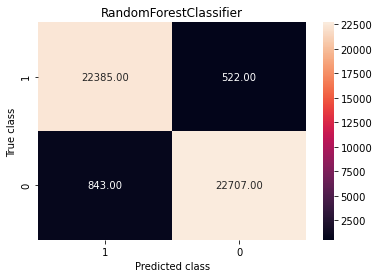

In [44]:
conf(rf,X_rfe_test, y_test)

In [32]:
#LR

lr = LogisticRegression()
predict(lr,X_rfe_train,y_train,X_rfe_test,y_test)
print(classification_report(y_test, lr.predict(X_rfe_test)))

Training Accuracy: 80.71
Testing  Accuracy: 80.45
              precision    recall  f1-score   support

           0       0.78      0.86      0.81     23229
           1       0.84      0.75      0.79     23228

    accuracy                           0.80     46457
   macro avg       0.81      0.80      0.80     46457
weighted avg       0.81      0.80      0.80     46457



C:\Users\moinu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
# GBC

gbc = GradientBoostingClassifier()
predict(gbc,X_rfe_train,y_train,X_rfe_test,y_test)
print(classification_report(y_test, gbc.predict(X_rfe_test)))

Training Accuracy: 93.35
Testing  Accuracy: 93.22
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     23229
           1       0.95      0.91      0.93     23228

    accuracy                           0.93     46457
   macro avg       0.93      0.93      0.93     46457
weighted avg       0.93      0.93      0.93     46457



In [34]:
# ADA

ada = AdaBoostClassifier()
predict(ada,X_rfe_train,y_train,X_rfe_test,y_test)
print(classification_report(y_test, ada.predict(X_rfe_test)))

Training Accuracy: 90.14
Testing  Accuracy: 90.21
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     23229
           1       0.91      0.89      0.90     23228

    accuracy                           0.90     46457
   macro avg       0.90      0.90      0.90     46457
weighted avg       0.90      0.90      0.90     46457



In [35]:
#xgb

xg = xgb.XGBClassifier()
predict(xg,X_rfe_train,y_train,X_rfe_test,y_test)
print(classification_report(y_test, xg.predict(X_rfe_test)))

C:\Users\moinu\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:52:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Training Accuracy: 97.98
Testing  Accuracy: 96.96
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23229
           1       0.98      0.96      0.97     23228

    accuracy                           0.97     46457
   macro avg       0.97      0.97      0.97     46457
weighted avg       0.97      0.97      0.97     46457



C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [36]:
#MLP

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1)
predict(mlp,X_rfe_train,y_train,X_rfe_test,y_test)
print(classification_report(y_test, mlp.predict(X_rfe_test)))

C:\Users\moinu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Accuracy: 90.9
Testing  Accuracy: 90.18
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     23229
           1       0.89      0.92      0.90     23228

    accuracy                           0.90     46457
   macro avg       0.90      0.90      0.90     46457
weighted avg       0.90      0.90      0.90     46457



In [37]:
import tensorflow as tf
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64,activation='relu',input_shape= (95,)))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                6144      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 14,593
Trainable params: 14,593
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

epochs_hist = model.fit(X_rfe_train,y_train,epochs=150,batch_size=20)

Epoch 1/150
5420/5420 [==============================] - 5s 944us/step - loss: 0.3896 - accuracy: 0.8122
Epoch 2/150
5420/5420 [==============================] - 5s 915us/step - loss: 0.3571 - accuracy: 0.8321
Epoch 3/150
5420/5420 [==============================] - 5s 930us/step - loss: 0.3421 - accuracy: 0.8400
Epoch 4/150
5420/5420 [==============================] - 5s 917us/step - loss: 0.3316 - accuracy: 0.8473
Epoch 5/150
5420/5420 [==============================] - 5s 916us/step - loss: 0.3241 - accuracy: 0.8500
Epoch 6/150
5420/5420 [==============================] - 5s 913us/step - loss: 0.3180 - accuracy: 0.8539
Epoch 7/150
5420/5420 [==============================] - 5s 948us/step - loss: 0.3095 - accuracy: 0.8592
Epoch 8/150
5420/5420 [==============================] - 5s 944us/step - loss: 0.3041 - accuracy: 0.8613
Epoch 9/150
5420/5420 [==============================] - 5s 949us/step - loss: 0.2971 - accuracy: 0.8665
Epoch 10/150
5420/5420 [==============================]

5420/5420 [==============================] - 5s 951us/step - loss: 0.1673 - accuracy: 0.9370
Epoch 79/150
5420/5420 [==============================] - 5s 954us/step - loss: 0.1662 - accuracy: 0.9364
Epoch 80/150
5420/5420 [==============================] - 5s 955us/step - loss: 0.1654 - accuracy: 0.9372
Epoch 81/150
5420/5420 [==============================] - 5s 951us/step - loss: 0.1658 - accuracy: 0.9372
Epoch 82/150
5420/5420 [==============================] - 5s 945us/step - loss: 0.1652 - accuracy: 0.9372
Epoch 83/150
5420/5420 [==============================] - 5s 940us/step - loss: 0.1639 - accuracy: 0.9376
Epoch 84/150
5420/5420 [==============================] - 5s 952us/step - loss: 0.1629 - accuracy: 0.9380
Epoch 85/150
5420/5420 [==============================] - 5s 953us/step - loss: 0.1626 - accuracy: 0.9379
Epoch 86/150
5420/5420 [==============================] - 5s 948us/step - loss: 0.1628 - accuracy: 0.9381
Epoch 87/150
5420/5420 [==============================] - 5

Text(0.5, 1.0, 'Loss and Accuracy plot')

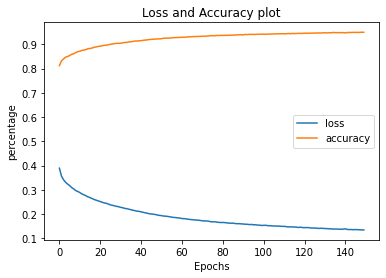

In [41]:
y_pred=model.predict(X_rfe_test)

y_pred = (y_pred>0.5)

plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('percentage')
plt.legend(['loss','accuracy'])
plt.title('Loss and Accuracy plot')

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     23229
           1       0.92      0.94      0.93     23228

    accuracy                           0.93     46457
   macro avg       0.93      0.93      0.93     46457
weighted avg       0.93      0.93      0.93     46457

